<a href="https://colab.research.google.com/github/mAminl/HWs/blob/master/HW2Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Full Name: MohammadAmin Latifi

Student Number: 401300966

HW 2, Question 1: 

Part a)

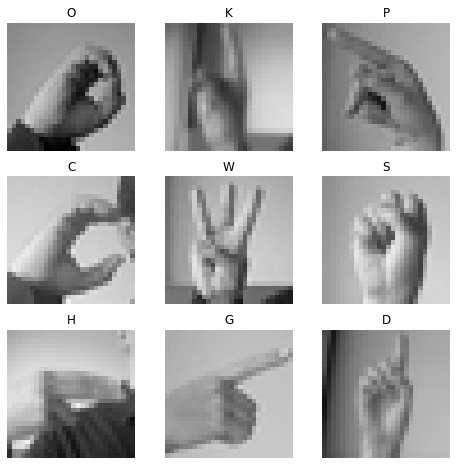

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from PIL import Image

Data = pd.read_csv('/Q3_train.csv', sep=',')
train = torch.tensor( data = Data.values, requires_grad = False ).int()

figure = plt.figure(figsize=(8, 8))
cols, rows = 3,3
unique_labels = []
k = 1
while len(unique_labels) < 9 :
    length = len(unique_labels)
    sample_idx = torch.randint(len(train), size=(1,)).item()
    a = train[sample_idx ,1:].numpy()
    img = Image.fromarray(a.reshape(28,28))
    label = chr(ord('@')+int(train[sample_idx,0].numpy())+1)
    unique_labels.append(label) if label not in unique_labels else unique_labels
    if (len(unique_labels) > length):
      figure.add_subplot(rows, cols, k)
      plt.title(label)
      plt.axis("off")
      plt.imshow(img, cmap="gray")
      k+=1
plt.show()

Part b):

In [2]:
from torch.utils.data import DataLoader

train_targets = torch.nn.functional.one_hot(train[:,0].to(torch.int64))
train = torch.cat((train[:,1:],train_targets),1)


Valid,Train = torch.split(train,[int(len(train)/5),len(train)-int(len(train)/5)])
print(f'Validation data shape is: {Valid.shape}')
print(f'Train data shape is: {Train.shape}')
train_dataloader = DataLoader(Train, batch_size=16, shuffle=True)
valid_dataloader = DataLoader(Valid, batch_size=16, shuffle=True)

from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 25)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device).float()
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, X in enumerate(dataloader):
        X = X.to(device).float()
        x = torch.nn.functional.normalize(X[:,:-25], p=2.0, dim=1, eps=1e-12, out=None)
        y = X[:,-25:]
        # Compute prediction error
        pred = model(x)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X in dataloader:
            X = X.to(device).float()
            x = torch.nn.functional.normalize(X[:,:-25], p=2.0, dim=1, eps=1e-12, out=None)
            y = X[:,-25:]
            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

epochs = 40
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(valid_dataloader, model, loss_fn)
print("Done!")

Validation data shape is: torch.Size([4009, 809])
Train data shape is: torch.Size([16040, 809])
Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=25, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 3.228287  [    0/16040]
loss: 3.221693  [ 1600/16040]
loss: 3.223173  [ 3200/16040]
loss: 3.191238  [ 4800/16040]
loss: 3.157642  [ 6400/16040]
loss: 3.202770  [ 8000/16040]
loss: 3.200505  [ 9600/16040]
loss: 3.192140  [11200/16040]
loss: 3.215097  [12800/16040]
loss: 3.138243  [14400/16040]
loss: 3.202154  [16000/16040]
Test Error: 
 Accuracy: 4.8%, Avg loss: 3.181603 

Epoch 2
-------------------------------
loss: 3.191786  [    0/16040]

In [12]:
train_dataloader = DataLoader(Train, batch_size=16, shuffle=True)
valid_dataloader = DataLoader(Valid, batch_size=16, shuffle=True)
model2 = NeuralNetwork().to(device).float()
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)
optimizer.zero_grad()
epochs = 30
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model2, loss_fn, optimizer)
    test(valid_dataloader, model2, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 3.238557  [    0/16040]
loss: 3.159248  [ 1600/16040]
loss: 3.163342  [ 3200/16040]
loss: 2.993405  [ 4800/16040]
loss: 3.035349  [ 6400/16040]
loss: 2.436769  [ 8000/16040]
loss: 2.336173  [ 9600/16040]
loss: 2.450615  [11200/16040]
loss: 2.245486  [12800/16040]
loss: 2.158995  [14400/16040]
loss: 2.220534  [16000/16040]
Test Error: 
 Accuracy: 27.1%, Avg loss: 2.155647 

Epoch 2
-------------------------------
loss: 1.752473  [    0/16040]
loss: 1.991144  [ 1600/16040]
loss: 2.493144  [ 3200/16040]
loss: 2.385125  [ 4800/16040]
loss: 1.692652  [ 6400/16040]
loss: 1.808601  [ 8000/16040]
loss: 2.010842  [ 9600/16040]
loss: 2.492184  [11200/16040]
loss: 2.047193  [12800/16040]
loss: 2.158327  [14400/16040]
loss: 2.038559  [16000/16040]
Test Error: 
 Accuracy: 32.1%, Avg loss: 1.900359 

Epoch 3
-------------------------------
loss: 1.748298  [    0/16040]
loss: 1.900749  [ 1600/16040]
loss: 2.221160  [ 3200/16040]
loss: 2.138920  [ 4800/160

In [25]:
Data = pd.read_csv('/Q3_test.csv', sep=',')
Test = torch.tensor( data = Data.values, requires_grad = False ).int()
Test_targets = torch.nn.functional.one_hot(Test[:,0].to(torch.int64))
Test = torch.cat((Test[:,1:],Test_targets),1)
Test_dataloader = DataLoader(Test, batch_size=16, shuffle=True)
epochs = 1
for t in range(epochs):
    print('\n Accuracy of SGD without dropout layer on test data is:\n')
    test(Test_dataloader, model, loss_fn)
    print('\n Accuracy of ADAM without dropout layer on test data is:\n')
    test(Test_dataloader, model2, loss_fn)
print("Done!")


 Accuracy of SGD without dropout layer on test data is:

Test Error: 
 Accuracy: 76.8%, Avg loss: 1.079017 


 Accuracy of ADAM without dropout layer on test data is:

Test Error: 
 Accuracy: 73.0%, Avg loss: 1.782823 

Done!


Part c):

In [52]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.Dropout(),
            nn.ReLU(),
            nn.Linear(128, 25)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model3 = NeuralNetwork2().to(device).float()
print(model3)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=8e-2)

train_dataloader = DataLoader(Train, batch_size=16, shuffle=True)
valid_dataloader = DataLoader(Valid, batch_size=16, shuffle=True)

epochs = 60
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model3, loss_fn, optimizer)
    test(valid_dataloader, model3, loss_fn)
print("Done!")

NeuralNetwork2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=25, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 3.226254  [    0/16040]
loss: 3.221869  [ 1600/16040]
loss: 3.216150  [ 3200/16040]
loss: 3.193453  [ 4800/16040]
loss: 3.189657  [ 6400/16040]
loss: 3.202899  [ 8000/16040]
loss: 3.159932  [ 9600/16040]
loss: 3.190446  [11200/16040]
loss: 3.144313  [12800/16040]
loss: 3.200562  [14400/16040]
loss: 3.184952  [16000/16040]
Test Error: 
 Accuracy: 4.5%, Avg loss: 3.183746 

Epoch 2
-------------------------------
loss: 3.216225  [    0/16040]
loss: 3.229225  [ 1600/16040]
loss: 3.162158  [ 3200/16040]
loss: 3.2036

In [56]:
model4 = NeuralNetwork2().to(device).float()
optimizer = torch.optim.Adam(model4.parameters(), lr=5e-4)
optimizer.zero_grad()
epochs = 60
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model4, loss_fn, optimizer)
    test(valid_dataloader, model4, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 3.214543  [    0/16040]
loss: 3.183165  [ 1600/16040]
loss: 3.209741  [ 3200/16040]
loss: 3.190517  [ 4800/16040]
loss: 3.123632  [ 6400/16040]
loss: 3.198734  [ 8000/16040]
loss: 2.942446  [ 9600/16040]
loss: 2.674212  [11200/16040]
loss: 2.558357  [12800/16040]
loss: 2.848825  [14400/16040]
loss: 2.734051  [16000/16040]
Test Error: 
 Accuracy: 16.0%, Avg loss: 2.580682 

Epoch 2
-------------------------------
loss: 2.450885  [    0/16040]
loss: 2.474297  [ 1600/16040]
loss: 2.604660  [ 3200/16040]
loss: 2.876366  [ 4800/16040]
loss: 2.350549  [ 6400/16040]
loss: 2.411824  [ 8000/16040]
loss: 2.608701  [ 9600/16040]
loss: 2.450571  [11200/16040]
loss: 2.376332  [12800/16040]
loss: 2.214232  [14400/16040]
loss: 2.014428  [16000/16040]
Test Error: 
 Accuracy: 27.9%, Avg loss: 2.102211 

Epoch 3
-------------------------------
loss: 2.224745  [    0/16040]
loss: 2.430825  [ 1600/16040]
loss: 2.161049  [ 3200/16040]
loss: 2.196945  [ 4800/160

In [58]:
epochs = 1
for t in range(epochs):
    print('\n Accuracy of SGD with dropout layer on test data is:\n')
    test(Test_dataloader, model3, loss_fn)
    print('\n Accuracy of ADAM with dropout layer on test data is:\n')
    test(Test_dataloader, model4, loss_fn)
print("Done!")


 Accuracy of SGD with dropout layer on test data is:

Test Error: 
 Accuracy: 76.5%, Avg loss: 1.056544 


 Accuracy of ADAM with dropout layer on test data is:

Test Error: 
 Accuracy: 72.5%, Avg loss: 2.270158 

Done!


Numerical results show that although the learning rate is much slower, models with the Adam optimizer learn very quickly in comparison with the SGD optimizer. On the other hand, the accuracy of the models with Adam optimizer on the test data is less than SGD.

Although models without dropout layers have 100% accuracy on the validation set, Numerical results show that models with dropout layers have higher accuracy on the test data, which shows the effect of generalization.

In conclusion, the model with SGD optimizer + dropout layers has the best performance (78.6%) on the test data.:
